In [213]:
''' 
Chapter One Benchmarking and Profiling. Profiliung is the rechnique that allows us to pinpoint most resource-intensive spots in
an application A profiler is a program that runs an application and monitors how long each function takes to execute.
BENCHMARKS: Are small scripts used to access the total execution time of your aplication

The mantra here is 
* Make it run, Make it right, Make it fast.
'''
# we will by designing the application in an obnject-oriantatied way.
class Particle:
    def __init__(self, x, y, ang_vel): # we accept + and - numbers for all paramenters
        self.x = x
        self.y = y
        self.ang_vel = ang_vel
        

# The full ParticleSimulation implementation:


class ParticleSimulator:

    def __init__(self, particles):
        self.particles = particles

    def evolve(self, dt):
        timestep = 0.00001
        nsteps = int(dt/timestep)
        for i in range(nsteps):
            for p in self.particles:
                # 1. calculate the direction
                norm = (p.x**2 + p.y**2) ** 0.5
                v_x = -p.y/norm
                v_y = p.x/norm

                #2. calculate the displacement
                d_x = timestep * p.ang_vel * v_x
                d_y = timestep * p.ang_vel * v_y

                p.x += d_x ; p.y += d_y
                # 3. repeat for all the time steps


In [214]:
from matplotlib import pyplot as plt 
from matplotlib import animation

def visualize(simulator):
    
    X = [p.x for p in simulator.particles]
    Y = [p.y for p in simulator.particles]

    fig = plt.figure()

    ax = plt.subplot(111, aspect='equal')
    line, = ax.plot(X, Y, 'ro')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)

    def init():
        line.set_data([], [])
        return line, # the coma is important!

    def animate(i):
        # We let the particle evolve for 0.01 time units

        simulator.evolve(0.01)
        X = [p.x for p in simulator.particles]
        Y = [p.y for p in simulator.particles]

        line.set_data(X, Y)
        return line,
    


    anim = animation.FuncAnimation(fig, animate, init_func=init, blit=True, interval=10)
    
    plt.show()

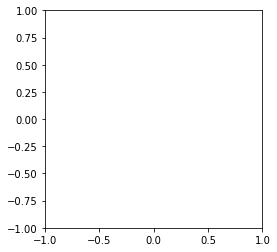

In [215]:
def test_visualize():
    particles = [Particle(0.3, 0.5, 1),
                 Particle(0.0, -0.5, -1),
                 Particle(-0.1, -0.4, 3)]
    
    simulator = ParticleSimulator(particles)
    visualize(simulator)

if __name__ == '__main__':
    test_visualize()

In [216]:
# Writing better tests and benchmarks with pytest-benchmark:

def test_evolve():
    particles = [Particle(0.3, 0.5, +1),
                 Particle(0.0, -0.5, -1),
                 Particle(-0.1, -0.4, +3)]
    
    simulator = ParticleSimulator(particles)

    simulator.evolve(0.1)
    p0, p1, p2 = particles

    def fequal(a, b, eps=1e-5):
        return abs(a - b) < eps 

    assert fequal(p0.x, 0.210269)
    assert fequal(p0.y, 0.543863)

    assert fequal(p1.x, -0.099334)
    assert fequal(p1.y, -0.490034)

    assert fequal(p2.x, 0.191358)
    assert fequal(p2.y, -0.365227)


In [217]:
import cProfile

pr =  cProfile.Profile()

pr.enable()

benchmark()

pr.disable()

pr.print_stats()

         751 function calls in 0.900 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.900    0.900 1559122893.py:7(<module>)
        1    0.000    0.000    0.000    0.000 1559122893.py:9(<module>)
        1    0.000    0.000    0.900    0.900 2930338771.py:117(benchmark)
        1    0.000    0.000    0.000    0.000 2930338771.py:118(<listcomp>)
      100    0.000    0.000    0.000    0.000 4007258775.py:11(__init__)
        1    0.000    0.000    0.000    0.000 4007258775.py:22(__init__)
        1    0.900    0.900    0.900    0.900 4007258775.py:25(evolve)
        2    0.000    0.000    0.000    0.000 codeop.py:140(__call__)
        4    0.000    0.000    0.000    0.000 compilerop.py:166(extra_flags)
        2    0.000    0.000    0.000    0.000 contextlib.py:107(__enter__)
        2    0.000    0.000    0.000    0.000 contextlib.py:116(__exit__)
        2    0.000    0.000    0.000    0.00

In [218]:
''' 
Optimizing our code 
Now that we have identified where exactly our app is spending most its time, make some changes and assess the change is performance.

To express the equations of motion in terms of radius, r, and angle , alpha. (instead of x and y)
then calculate the points on a circle using the following equation
'''
r = 11

alpha = 7 
from math import cos, sin

x = r * cos(alpha)

y = r * sin(alpha)



In [219]:
def (self, dt):
    timestep = 0.00001
    nsteps = int(dt/timestep)

    # Loop order is changed
    for p in self.particles:
        t_x_ang = timestep * p.ang_vel
        for i in range(nsteps):
            norm = (p.x**2 + p.y**2)**0.5
            p.x, p.y = (p.x - t_x_ang * p.y/norm,
                        p.y + t_x_ang * p.x/norm)


SyntaxError: invalid syntax (Temp/ipykernel_26960/1428581420.py, line 1)

In [ ]:
evolve_fast(self, dt) 

NameError: name 'evolve_fast' is not defined

In [ ]:
# The dis module: to inspect how the code is converted to bytecode, we can use the dis module

import dis

# will print for each line in the function, a list of bytecode instructions.

#dis.dis(ParticleSimulator.evolve)[2]

In [ ]:
# Pure Python Optimizations 
 
n = list(range(15))
display(n)

for i, _ in enumerate(n):
    n[i] += 1

display(n)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [ ]:
# bisect module allows fast searches on sorted arrays. 
# The bisect.bisect function can be used on a sorted list to find the index to place and elemnet 
# while maintaining the array in sorted order

import bisect

collection = [1, 2, 4, 5, 6]

# This function uses the binary search algo with O(log(N)) running time. 
# running time will increase by a constant amount every time you double your input size.

bisect.bisect(collection, 3)

2

In [ ]:
"""
If value we are trying to insert is already present in list. the function will return location after
already present value. Therefore, we can use the bisect.bisect_left variant, returning correct index.
"""

def index_bisect(a, x):
    'Locate the leftmost value exactly equal to a'
    i = bisect.bisect_left(a,  x)
    if i != len(a) and a[i] == x:
        return i
        raise ValueError

In [ ]:
"""
Dictionaries: extremely versatile and extensively used in the py language.
Dictionaries are implemented as hash maps
""" 

display(hash('hello'))


# To restrict the number to be a certain range use (%) operator

display(hash('hello') % 10)

647163784322000273

3

In [ ]:
"""
A dictionary can be used to efficiently count unique elements in a list.
In this example, we define the counter_dict function that takes a list
returning a dict containing the nunber of occurrences of each value in the list.
"""

def counter_dict(items):
    counter = {}
    for item in items:
        if item not in counter:
            counter[item] = 1
        else:
            counter[item] += 1
        return counter


In [ ]:
"""
The code can be simplified using collections.defaultdict.
Will produce dictionaries where each new key is automatically assigned a default value
"""

from collections import defaultdict

def counter_defaultdict(items):
    counter = defaultdict(int)
    for item in items:
        counter[item] += 1
    return counter

In [ ]:
"""
The collections module also includes a Counter class that can be used for the same purpose

"""
items = range(10)
from collections import Counter

counter = Counter(items)
counter

Counter({0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1})

In [ ]:
"""
Bulding an in-memory search index using a hash map
Ditionaries can be used to quickly search for a word in a list docs, similar to search engine.
build an inverted index based on a dictionary of lists
"""
docs = ['the cat is under the table',
        'the dog is under the table',
        'cats and dogs smell roses'
        'Carla eats an apple']

# simple way to retrieve all documents that match a query is scan each document and test for the presence of a word

matches = [doc for doc in docs if 'table' in doc]

matches

['the cat is under the table', 'the dog is under the table']

In [ ]:
# building and index
index = {}

for i, doc in enumerate(docs):
    # We iterate over each term in the document
    for word in doc.split():
        # We build a list containing the indices, where term appears
        if word not in index:
            index[word] = [i]
        else:
            index[word].append(i)

# After bulding index, doing a query is a simple dic look up.

index_result = index['table']
display(index_result)

result_documents = [docs[i] for i in index_result]
display(result_documents)


[0, 1]

['the cat is under the table', 'the dog is under the table']

In [ ]:
# Sets: cointain only unique elements.

#x = list(range(500)) + list(range(500))

x_solo = set(['javier', 'javier'])

x_solo

{'javier'}

In [ ]:
# Building an index using sets

index = {}

for i, doc in enumerate(docs):
    # We iterate over each term in documents
    for word in doc.split():
        # build a set containing the indices, where term appears
        if word not in index:
            index[word] = {i}
        else:
            index[word].add(i)
# Querying the documents containing both 'cat' and 'table'
index['cat'].intersection(index['table'])

{0}

In [ ]:
# Heaps: built using the procedures contained in haepq module on an underlying list.

import heapq

heapq_collection =  [10, 3, 3, 4,  5, 6]

heapq.heapify(heapq_collection)

display(heapq_collection)

# To perform insertion and extraction operations on  the heap we can use the heapq.heappush and heapq.heappop
# function will extract the min val in collection in O(log(N)) time 

display(heapq.heappop(heapq_collection))

# Similarly, you can push with

heapq.heappush(heapq_collection, 1991)


display(heapq_collection)


[3, 3, 6, 4, 5, 10]

3

[3, 4, 6, 10, 5, 1991]

In [ ]:
"""
Another optionis queue.PriorityQueue class that,is thread and process-safe.
The PriorityQueue class can be filled up with using the PriorityQueue.put method,
while PriorityQueue.get can be used to be extract the minimin value in collection
"""

from queue import PriorityQueue

queue = PriorityQueue()
for element in collection:
    queue.put(element)

queue.get()

1

In [ ]:
queue = PriorityQueue()
queue.put((3, "priority 3"))
queue.put((2, "priority 2"))
queue.put((1, "priority 1"))

queue.get()


(1, 'priority 1')

In [ ]:
# Tries(sometimes called a prefix tree).
# Tries are extremely fast at matching a list of strings against a prefix.


from random import choice
from string import ascii_uppercase
from patricia import trie

def random_string(length):
    '''Produce a random string made of *length* uppercase ascii chars'''
    return ''.join(choice(ascii_uppercase) for i in range(length))

In [ ]:
strings = [random_string(32) for i in range(500)]

matches = [s for s in strings if s.startswith('AA')]

# List comprehension and str.startwith are already very optimized operations

%timeit [s for s in strings if s.startswith('AA')]

49.5 µs ± 3.08 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
strings_dict = {s:0 for s in strings}

# A dictionary where all values are 0

strings_trie = trie(**strings_dict)

# To query patricia-trie for a matching prefix

iterMatches = list(strings_trie.iter('AA'))

# Now we time 

%timeit list(strings_trie.iter('AA'))

3.88 µs ± 364 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
""" 
Caching and memoization
Caching is a great technique used to improve the performance of a wide range of applications.

Given the usefulness of this technique,
the Py standard library includes a simple inmemory cache in functools module

"""


' \nCaching and memoization\nCaching is a great technique used to improve the performance of a wide range of applications.\n\nGiven the usefulness of this technique,\nthe Py standard library includes a simple inmemory cache in functools module\n\n'

In [ ]:

from functools import lru_cache

@lru_cache()
def sum2(a, b):
    print("Calculating {} + {}".format(a, b))
    return a + b 

print(sum2(4, 2))
print(sum2(1, 2))

Calculating 4 + 2
6
Calculating 1 + 2
3


In [ ]:

"""
The lru_cache deco also provides other basic features. To restrict the size od the cache,
one can set the number of elements we inted to maintain through the max_size argument.
If we want unbounded cache specify None.
"""


'\nThe lru_cache deco also provides other basic features. To restrict the size od the cache,\none can set the number of elements we inted to maintain through the max_size argument.\nIf we want unbounded cache specify None.\n'

In [ ]:
@lru_cache(maxsize=8)
# this way we execute sum2 with different arguments,cache will reach a max size
# and keep requesting more calculations, new values replacing older values in cache
def mul2(a, b):
    print("Calculating {} + {}".format(a, b))
    return a * b 

print(mul2(4, 2))
print(mul2(1, 2))

Calculating 4 + 2
8
Calculating 1 + 2
2


In [ ]:
"""
The lru_cache decorator also adds extra functionalities to the docorated fucntion.
Examine cache performance using cache_info method, and possible to reset cache with cache_clear method.
"""

sum2.cache_info()

CacheInfo(hits=0, misses=2, maxsize=128, currsize=2)

In [ ]:
sum2.cache_clear()

In [ ]:
# Example of benefit from caching. 
# Define fibonacci fun and time it

def fibona(n):
    if n < 1:
        return 1
    else:
        return fibona(n - 1) + fibona(n - 2)

%timeit fibona(20)

3.31 ms ± 97.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
import timeit 

setup_code = '''

from functools import lru_cache
from __main__ import fibona
fibona_memoized = lru_cache(maxsize=None)(fibona)
'''

results = timeit.repeat(
    'fibona_memoized(20)',
    setup=setup_code,
    repeat=1000,
    number=1)

print("Fibona took {:.2f} us".format(min(results)))

Fibona took 0.00 us


In [ ]:
# Joblib provides a simple on-disk cache is joblib. used similar as lru_cache,
# results will stored on disk and will persist between runs.

In [ ]:
from joblib import Memory

memory = Memory(location='.')

In [ ]:
# results will be stored on-disk in the directory specified
# by the cachedir argument during Memory initialization. cached results persist over runs.
# allows limit of recomputation only when certain arguments change,
# and the resulting decorated function supports basic functionalities to clear and analyze the cache.
# Perhaps the best joblib feature is the intelligent hashing algo proving
# efficient memoization of functions that operate on np arrays.
 


@memory.cache
def Msum2(a, b):
    return a + b


In [ ]:


Msum2(5,5)

________________________________________________________________________________
[Memory] Calling __main__-C%3A-Users-JBarr-AppData-Local-Temp-ipykernel_26960-2913515201.Msum2...
Msum2(5, 5)
____________________________________________________________Msum2 - 0.0s, 0.0min


10

In [ ]:
# Comprahansions and generators
# We will explore strategies to speed up Py loops using comprahansions and generators.

def loop():
    res = []
    for i in range(100000):
        res.append( i * i)
    return sum(res)

def comprehension():
    return sum([i * i for i in range(100000)])

def generator():
    return sum(i * i for i in range(100000))

In [ ]:
%timeit loop()


12.2 ms ± 180 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%timeit comprehension()

9.23 ms ± 127 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%timeit generator()

9.01 ms ± 105 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
def sqloop():
    resDict = {}
    for i in range(100000):
        resDict[i] = i
    return resDict


def sqcomprehension():
    return {i: i for i in range(100000)}

In [ ]:

%timeit sqloop()


10.5 ms ± 148 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.79 ms ± 162 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:

%timeit sqcomprehension()

In [ ]:
# Efficient looping (especially in terms of memory)
# done using iterators and functions such as filter and map.

def map_comprehension(numbers):
    a = [n * 2 for n in numbers]
    b = [n ** 2 for n in a]
    c = [n ** 0.33  for n in b]
    return max(c)


def map_normal(numbers):
    a = map(lambda n: n * 2, numbers)
    b = map(lambda n: n ** 2, a)
    c = map(lambda n: n ** 0.33, b)
    return max(c)

In [ ]:


numbers = range(1000000)

%timeit map_comprehension(numbers)



717 ms ± 11 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [222]:
import numpy as np

In [223]:
""" 
Chapter 3:
    Fast Array Operatons with Numpy and Pandas

"""

A = np.array([0,1,2,3,4,5,6,7,8,9])


print(A[0])

print([a for a in A])

0
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [224]:
"""
Ex: shows how slocing syntax can be used in real-world setting

"""

r_i = np.random.rand(10, 2)


In [225]:


x_i = r_i[:, 0]

print(x_i)

r_0 = r_i[0, :]

print(r_0)

[0.83329657 0.05445737 0.27879865 0.27653161 0.62993136 0.13867726
 0.61736385 0.10474252 0.69048802 0.57464108]
[0.83329657 0.79298297]


In [226]:
a = np.array([
    [0.5653667, 0.40387571],
    [0.47862077, 0.47436663],
    [0.8769373, 0.13338962],
    [0.04260282, 0.13847179]
    ])


In [227]:
a.sum()

3.1136313400000004

In [228]:

idx = np.array([0,2])
a[idx]


array([[0.5653667 , 0.40387571],
       [0.8769373 , 0.13338962]])

In [229]:
"""
Broadcasting: Whenever doing arithmetic operation on two arrays (like a product),
if the two operands have the same shape, the operation will be applied in an element-wise fashion.
"""

J = np.array([[1,2], [3,4]])


M = np.array([[5,6], [7,8]])


print(J * M)

print(J * 2)


[[ 5 12]
 [21 32]]
[[2 4]
 [6 8]]


In [232]:
norm = np.sqrt(x**2 + y**2)

r_i = np.random.rand(10, 2)
norm = np.sqrt((r_i ** 2).sum(axis=1))
print(norm)

[0.25806514 0.78973455 0.49449905 0.2303789  0.64584506 0.83305309
 0.99115236 0.43667967 0.64698088 0.90673458]


In [235]:
# Rewriting the particle simulator in NumPy 

def evolve_numpy(self, dt):
    timestep = 0.00001
    nsteps = int(dt/timestep)

    r_i = np.array([[p.x, p.y] for p in self.particles])

    ang_vel_i = np.array([p.ang_vel for p in self.particles])

    for i in range(nsteps):
        norm_i = np.sqrt((r_i ** 2).sum(axis=1))
        v_i = r_i[:, [1, 0]]
        v_i[:, 0] *= -1
        v_i /= norm_i[:, np.newaxis]
        d_i = timestep * ang_vel_i[:,np.newaxis] * v_i
        r_i += d_i

        for i, p in enumerate(self.particles):
            p.x, p.y = r_i[i]

In [237]:

def benchmarkNP(npart=100, nethod='python'):
    particles = [Particle(uniform(-1.0, 1.0),
                          uniform(-1.0, 1.0),
                          uniform(-1.0, 1.0))
                          for i in range(npart)]